In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline

import string
import unicodedata

import json
import nltk
from collections import Counter

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.util import ngrams

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc

In [3]:
data = pd.read_pickle("./data/reviews.pkl")

In [8]:
data.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4.0,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4.0,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5.0,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2.0,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4.0,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01


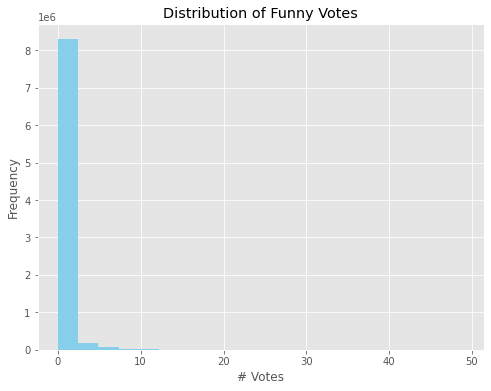

In [5]:
# histogram of funny column to show distribution

fig, ax = plt.subplots(figsize = (8,6))

ax.hist(data[data.funny < 50].funny, bins = 20, color = 'skyblue')
ax.set_title('Distribution of Funny Votes')
ax.set_xlabel('# Votes')
ax.set_ylabel('Frequency');
#plt.savefig('imgs/funnyhist_full.png')

In [7]:
max(data.funny)

610

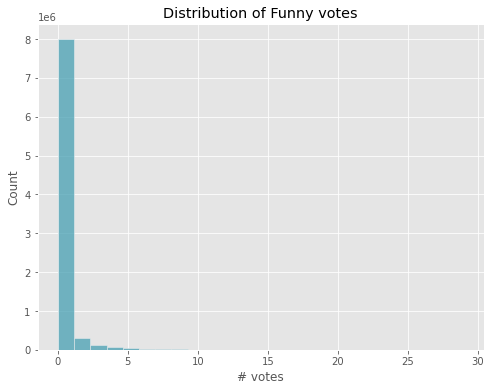

In [11]:
# histogram of funny column to show distribution

sns.set_palette('Spectral_r')

fig, ax = plt.subplots(figsize = (8,6))

ax = sns.histplot(data[data.funny < 30].funny)
plt.title('Distribution of Funny votes')
ax.set_xlabel('# votes');
#plt.savefig('imgs/funnyhist_full.png', bbox_inches='tight')

In [3]:
# read in text only df
reviews_df = pd.read_pickle("./data/final_reviews.pkl")

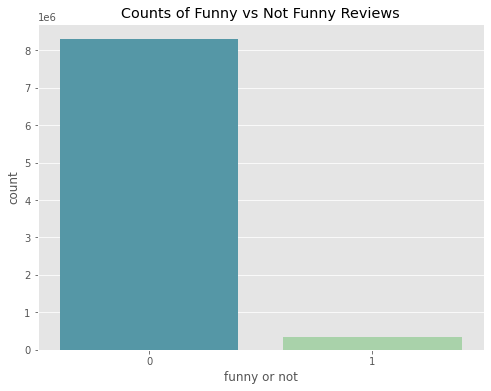

In [13]:
# barchart for counts of funny vs not funny

fig, ax = plt.subplots(figsize = (8,6))

sns.countplot(x = 'funny or not', data = reviews_df)
plt.title('Counts of Funny vs Not Funny Reviews');
#plt.savefig('imgs/funnyvsnotfunnycounts.png', bbox_inches='tight')

### Feature engineering

In [4]:
## check for emojis

import emoji

def extract_emojis(s):
    return ''.join(c for c in s if c in emoji.UNICODE_EMOJI)

In [6]:
reviews_df["emojis"] = reviews_df["text"].apply(extract_emojis)

In [ ]:
## no emojis, drop column
reviews_df = reviews_df.drop(columns = 'emojis')

In [5]:
reviews_df.head()

,text,funny or not
0,Apparently Prides Osteria had a rough summer a...,0
1,This store is pretty good. Not as great as Wal...,0
2,I called WVM on the recommendation of a couple...,0
3,I've stayed at many Marriott and Renaissance M...,0
4,The food is always great here. The service fro...,0


In [ ]:
# barchart for average review length of funny vs not funny

fig, ax = plt.subplots(figsize = (8,6))

sns.barplot()

#### Compare average review length between two classes ##

In [ ]:
reviews_df.text.str.split().str.len().mean()

In [ ]:
#reviews_df.text.str.split().str.len().groupby(reviews_df['funny or not']).mean()

In [105]:
# barplot
type(X_train_balanced.iloc[0])

str

In [84]:
X_df = pd.DataFrame(X_train_balanced)

In [113]:
X_df

,text
6575434,I have come here many times before and never ...
6730957,I'm going to make this short and sweet. We sp...
5617345,"In putting my money where my mouth is, I am a ..."
6978226,"My previous complaint about PBO aside, you hav..."
8295817,I had long ago come to terms with living in a ...
...,...
6814170,Excellent place!!! Extremely clean...ALL staff...
8295676,"When I was a West End gal, I frequented Cafe L..."
4215413,"Great wings, good food, good service, good dri..."
6594057,My first time at Big Fat Greek Cuisine was a b...


In [112]:
X_df.iloc[0].str.split().str.len()

text    574
Name: 6575434, dtype: int64

In [115]:
## compare average review length between funny/not funny

X_df['review_length'] = X_df.text.str.split().str.len()

KeyboardInterrupt: 

In [ ]:
# stopping point

In [ ]:
# copy df

reviews_length_df = reviews_df.copy(deep = True)

In [ ]:
# drop reviews length 

reviews_df = reviews_df.drop(columns = 'review length')

In [ ]:
# pickle new df

reviews_df.to_pickle("./data/reviews_length_df.pkl")
reviews_length_df = pd.read_pickle("./data/reviews_length.pkl")

In [ ]:
reviews_df.text.str.split().str.len().groupby(reviews_df['funny or not']).mean().plot.bar()

## compare average review length between two classes

reviews_df.head(10).groupby('funny or not').text.apply(lambda x: x.str.split().str.len().mean())

### Logistic Regression with only text features

In [ ]:
## train test split

In [14]:
X = reviews_df['text']
y = reviews_df['funny or not']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
y_train.value_counts()

0    6635391
1     272931
Name: funny or not, dtype: int64

In [28]:
y_test.value_counts()

0    1659148
1      67933
Name: funny or not, dtype: int64

In [29]:
# balance train data
X_train_funny = X_train[y_train == 1]
X_train_not_funny = X_train[y_train == 0].sample(n=len(X_train_funny), random_state=42)

y_train_funny = y_train[y_train == 1]
y_train_not_funny = y_train[y_train == 0].sample(n=len(y_train_funny), random_state=42)

In [30]:
X_train_balanced = pd.concat([X_train_funny, X_train_not_funny])
y_train_balanced = pd.concat([y_train_funny, y_train_not_funny])

In [ ]:
# # save data
# X_train_balanced.to_csv('X_train_balanced.csv')
# y_train_balanced.to_csv('y_train_balanced.csv')

In [31]:
y_train_balanced.value_counts()

0    272931
1    272931
Name: funny or not, dtype: int64

In [ ]:
# take sample of 50k

sample_X_train_balanced = X_train_balanced.sample(n=50000, random_state=42)
sample_y_train_balanced = y_train_balanced.sample(n=50000, random_state=42)

In [32]:
# # read in data
# X_train_balanced_df = pd.read_csv('X_train_balanced.csv')
# y_train_balanced_df = pd.read_csv('y_train_balanced.csv')

In [38]:
# X_train_balanced_df = X_train_balanced_df.drop(['Unnamed: 0'], axis = 1)
# y_train_balanced_df = y_train_balanced_df.drop(['Unnamed: 0'], axis = 1)

#### TF-IDF Vectorization

In [34]:
tfidfvect = TfidfVectorizer(max_features = 3000, 
                            sublinear_tf=True, 
                            min_df=5, norm='l2', 
                            encoding='latin-1', 
                            ngram_range=(1, 2))

In [117]:
X_train_tfidf = tfidfvect.fit_transform(X_train_balanced)
X_test_tfidf = tfidfvect.transform(X_test)

In [118]:
X_train_tfidf.shape, X_test_tfidf.shape

((545862, 3000), (1727081, 3000))

In [ ]:
# stopping point


In [119]:
# get vocab
words = tfidfvect.get_feature_names()


In [120]:
words

['00',
 '10',
 '10 minutes',
 '100',
 '11',
 '12',
 '14',
 '15',
 '15 minutes',
 '18',
 '20',
 '20 minutes',
 '24',
 '25',
 '30',
 '30 minutes',
 '40',
 '45',
 '50',
 '75',
 '95',
 '99',
 'able',
 'able to',
 'about',
 'about how',
 'about it',
 'about my',
 'about the',
 'about this',
 'above',
 'absolutely',
 'accommodating',
 'across',
 'across the',
 'actual',
 'actually',
 'add',
 'added',
 'addition',
 'addition to',
 'additional',
 'admit',
 'affordable',
 'after',
 'after the',
 'afternoon',
 'again',
 'again and',
 'against',
 'ago',
 'ahead',
 'air',
 'airport',
 'alcohol',
 'all',
 'all in',
 'all my',
 'all of',
 'all over',
 'all that',
 'all the',
 'all you',
 'allowed',
 'almost',
 'alone',
 'along',
 'along with',
 'already',
 'also',
 'also had',
 'also have',
 'also the',
 'although',
 'always',
 'always been',
 'am',
 'am not',
 'amazing',
 'amazing and',
 'ambiance',
 'american',
 'amount',
 'amount of',
 'an',
 'an amazing',
 'an appointment',
 'an hour',
 'and',
 

In [121]:
vocab_dict = tfidfvect.vocabulary_
vocab_dict

{'have': 1042,
 'come': 508,
 'here': 1079,
 'many': 1424,
 'times': 2509,
 'before': 315,
 'and': 88,
 'never': 1559,
 'ever': 743,
 'had': 1013,
 'such': 2197,
 'bad': 272,
 'experience': 763,
 'like': 1336,
 'did': 610,
 'yesterday': 2961,
 'even': 737,
 'left': 1325,
 'four': 881,
 'start': 2170,
 'review': 1942,
 'once': 1671,
 'but': 379,
 'this': 2477,
 'time': 2501,
 'just': 1281,
 'can': 421,
 'it': 1228,
 'was': 2731,
 'really': 1908,
 'we': 2785,
 'went': 2828,
 'in': 1149,
 'to': 2514,
 'my': 1517,
 'birthday': 333,
 'some': 2123,
 'mexican': 1465,
 'app': 184,
 'because': 299,
 'am': 76,
 'food': 836,
 'ok': 1651,
 'our': 1712,
 'waiter': 2712,
 'told': 2584,
 'wanted': 2726,
 'big': 329,
 'when': 2857,
 'she': 2053,
 'came': 414,
 'table': 2222,
 'brought': 364,
 'the': 2290,
 'small': 2100,
 'her': 1077,
 'they': 2442,
 'were': 2834,
 'be': 290,
 'large': 1315,
 'said': 1966,
 'thought': 2492,
 'you': 2963,
 'guys': 1011,
 'is': 1193,
 'don': 651,
 'mind': 1472,
 'want':

In [122]:
from collections import Counter
dict(Counter(vocab_dict).most_common(50))

{'zero': 2999,
 'yummy': 2998,
 'yum': 2997,
 'yourself': 2996,
 'your own': 2995,
 'your food': 2994,
 'your': 2993,
 'young': 2992,
 'you would': 2991,
 'you won': 2990,
 'you will': 2989,
 'you want': 2988,
 'you walk': 2987,
 'you ve': 2986,
 'you to': 2985,
 'you think': 2984,
 'you the': 2983,
 'you should': 2982,
 'you re': 2981,
 'you need': 2980,
 'you might': 2979,
 'you may': 2978,
 'you ll': 2977,
 'you like': 2976,
 'you know': 2975,
 'you just': 2974,
 'you have': 2973,
 'you go': 2972,
 'you get': 2971,
 'you feel': 2970,
 'you don': 2969,
 'you do': 2968,
 'you could': 2967,
 'you can': 2966,
 'you are': 2965,
 'you and': 2964,
 'you': 2963,
 'yet': 2962,
 'yesterday': 2961,
 'yes': 2960,
 'yelp': 2959,
 'years and': 2958,
 'years ago': 2957,
 'years': 2956,
 'year old': 2955,
 'year': 2954,
 'yeah': 2953,
 'www': 2952,
 'wrong': 2951,
 'writing': 2950}

In [ ]:
# plot most common words

data = dict(Counter(vocab_dict).most_common(30))
word_df = pd.DataFrame.from_dict(data, orient='index', columns = ['count'])


#### Modeling

In [124]:
lr = LogisticRegression(random_state=0, max_iter = 500)
lr.fit(X_train_tfidf, y_train_balanced)


LogisticRegression(max_iter=500, random_state=0)

In [ ]:
# save model

In [125]:
y_pred_lr = lr.predict(X_test_tfidf)
y_proba_lr = lr.predict_proba(X_test_tfidf)[:,1]

In [126]:
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))

Accuracy: 0.7470825051054352
Precision: 0.10643991123250256
Recall: 0.7342823075677506


In [127]:
# confusion matrix

confusion_matrix(y_test, y_pred_lr)
# true positive, false negative
# false positive, true negative

array([[1240390,  418758],
       [  18051,   49882]])

In [61]:
# precision-recall curve

def calculate_threshold_values(prob, y):
    '''
    Build dataframe of the various confusion-matrix ratios by threshold
    from a list of predicted probabilities and actual y values
    '''
    df = pd.DataFrame({'prob': prob, 'y': y})
    df.sort_values('prob', inplace=True)
    
    actual_p = df.y.sum()
    actual_n = df.shape[0] - df.y.sum()

    df['tn'] = (df.y == 0).cumsum()
    df['fn'] = df.y.cumsum()
    df['fp'] = actual_n - df.tn
    df['tp'] = actual_p - df.fn

    df['fpr'] = df.fp/(df.fp + df.tn)
    df['tpr'] = df.tp/(df.tp + df.fn)
    df['precision'] = df.tp/(df.tp + df.fp)
    df = df.reset_index(drop=True)
    return df

In [62]:
def plot_precision_recall(ax, df):
    ax.plot(df.tpr,df.precision, label='precision/recall')
    #ax.plot([0,1],[0,1], 'k')
    ax.set_xlabel('recall')
    ax.set_ylabel('precision')
    ax.set_title('Precision/Recall Curve')
    ax.plot([0,1],[df.precision[0],df.precision[0]], 'k', label='random')
    ax.set_xlim(xmin=0,xmax=1)
    ax.set_ylim(ymin=0,ymax=1)

In [128]:
df = calculate_threshold_values(y_proba_lr, y_test)

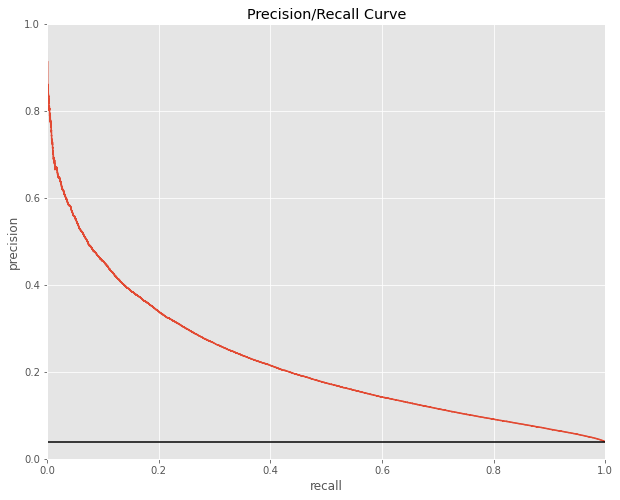

In [129]:
fig, ax = plt.subplots(figsize=(10,8))

plot_precision_recall(ax, df)

In [130]:
precision, recall, _ = precision_recall_curve(y_test, y_proba_lr)
auc_score = auc(recall, precision)
print('Logistic PR AUC: %.3f' % auc_score)

Logistic PR AUC: 0.222


The black line is the performance when guessing the class randomly. The precision recall curve shows us that at a threshold of 0.5, 

#### Feature Importance

In [ ]:
# words indices

important_tokens = pd.DataFrame(
    data=lr.coef_[0],
    index=tfidfvect.get_feature_names(),
    columns=['coefficient']
).sort_values(by='coefficient', ascending=False)

In [ ]:
important_tokens[:50]

In [ ]:
important_tokens[:30].sort_values(by='coefficient').plot(kind='barh', figsize = (14,10), color = 'limegreen')
plt.title('Logistic Regression Feature Importance')
#plt.savefig('featureimportance.png', bbox_inches='tight')